<a href="https://colab.research.google.com/github/boshuaiYu/CaiCai_DL/blob/main/CaiCai_DL_Week6.3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn,optim
import matplotlib.pyplot as plt
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/week4_function")
from torchLearning import *

# **一、Batch Normalization与Batch_size综合调参**

&emsp;&emsp;<font color="orange">一般来说，我们在使用BN时，至少需要保证小批数据量（batch_size)在15-30以上，才能进行相对准确的预估。此处我们适当调整小批数据量参数，再进行模型计算。

In [3]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)
train_loader, test_loader = split_loader(features,labels,batch_size=50)

In [4]:
torch.manual_seed(24)

sigmoid_model1 = net_class1(act_fun=torch.sigmoid)
sigmoid_model1_norm = net_class1(act_fun=torch.sigmoid,BN_model="pre")

model_l = [sigmoid_model1,sigmoid_model1_norm]
name_l = ["sigmoid_model1","sigmoid_model1_norm"]

lr = 0.03
num_epochs = 40

train_l, test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

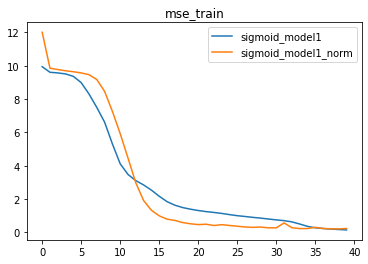

In [5]:
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train');

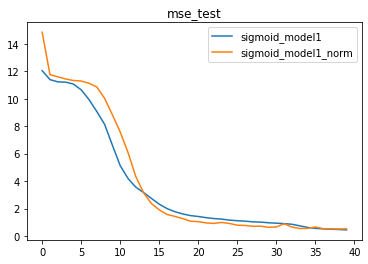

In [6]:
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test');

当然，为了确保BN层对整体统计量估计的可信度，除了提高batch_size之外，还能够通过调低momentum参数来实现，当然，伴随着momentum值得降低，我们也必须进一步提升遍历数据集得次数

In [10]:
torch.manual_seed(420)

features,labels = tensorGenReg(w=[2,-1],bias=False,deg=2)
train_loader, test_loader = split_loader(features,labels)

In [18]:
torch.manual_seed(24)

sigmoid_model1 = net_class1(act_fun=torch.sigmoid,momentum=0.01)
sigmoid_model1_norm = net_class1(act_fun=torch.sigmoid,BN_model="pre",momentum=0.01)

model_l = [sigmoid_model1,sigmoid_model1_norm]
name_l = ["sigmoid_model1","sigmoid_model1_norm"]

lr = 0.03
num_epochs = 40

train_l, test_l = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

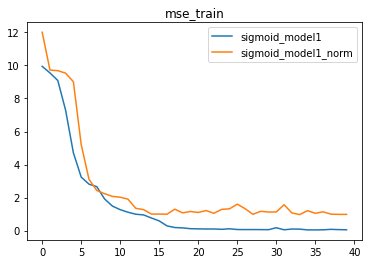

In [19]:
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train');

# **二、复杂模型上的Batch_normalization表现**

模型越复杂效果越好,可以很好缓解梯度消失问题

创建满足$y=2x_1^2-x_2^2+3x_3^2+x_4^2+2x_5^2$的回归类数据集

##**2.1 Sigmoid函数**

In [20]:
torch.manual_seed(420)

features, labels = tensorGenReg(w=[2,-1,3,1,2],bias=False,deg=2)
train_loader, test_loader = split_loader(features,labels,batch_size=50)

In [21]:
# class1对比
torch.manual_seed(24)

sigmoid_model1 = net_class1(act_fun=torch.sigmoid,in_features=5)
sigmoid_model1_norm = net_class1(act_fun=torch.sigmoid,in_features=5,BN_model="pre")

model_ls1 = [sigmoid_model1,sigmoid_model1_norm]
name_ls1 = ["sigmoid_model1","sigmoid_model1_norm"]

lr = 0.03
num_epochs = 40

train_ls1, test_ls1 = model_comparison(
    model_l=model_ls1,
    name_l=name_ls1,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# class2对比
torch.manual_seed(24)

sigmoid_model2 = net_class2(act_fun=torch.sigmoid,in_features=5)
sigmoid_model2_norm = net_class2(act_fun=torch.sigmoid,in_features=5,BN_model="pre")

model_ls2 = [sigmoid_model2,sigmoid_model2_norm]
name_ls2 = ["sigmoid_model2","sigmoid_model2_norm"]

lr = 0.03
num_epochs = 40

train_ls2, test_ls2 = model_comparison(
    model_l=model_ls2,
    name_l=name_ls2,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# class3对比
torch.manual_seed(24)

sigmoid_model3 = net_class3(act_fun=torch.sigmoid,in_features=5)
sigmoid_model3_norm = net_class3(act_fun=torch.sigmoid,in_features=5,BN_model="pre")

model_ls3 = [sigmoid_model3,sigmoid_model3_norm]
name_ls3 = ["sigmoid_model3","sigmoid_model3_norm"]

lr = 0.03
num_epochs = 40

train_ls3, test_ls3 = model_comparison(
    model_l=model_ls3,
    name_l=name_ls3,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# class4对比
torch.manual_seed(24)

sigmoid_model4 = net_class4(act_fun=torch.sigmoid,in_features=5)
sigmoid_model4_norm = net_class4(act_fun=torch.sigmoid,in_features=5,BN_model="pre")

model_ls4 = [sigmoid_model4,sigmoid_model4_norm]
name_ls4 = ["sigmoid_model4","sigmoid_model4_norm"]

lr = 0.03
num_epochs = 40

train_ls4, test_ls4 = model_comparison(
    model_l=model_ls4,
    name_l=name_ls4,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

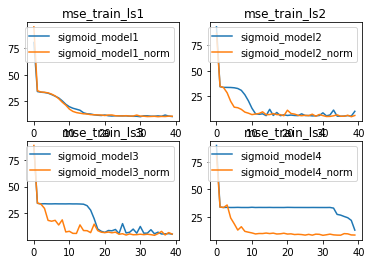

In [23]:
plt.subplot(221)
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), train_ls1[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls1')

plt.subplot(222)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), train_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls2')

plt.subplot(223)
for i, name in enumerate(name_ls3):
    plt.plot(list(range(num_epochs)), train_ls3[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls3')

plt.subplot(224)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), train_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls4');

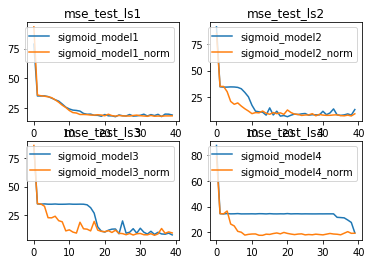

In [24]:
plt.subplot(221)
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), test_ls1[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls1')

plt.subplot(222)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), test_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls2')

plt.subplot(223)
for i, name in enumerate(name_ls3):
    plt.plot(list(range(num_epochs)), test_ls3[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls3')

plt.subplot(224)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), test_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls4');

Text(0.5, 1.0, 'mse_test')

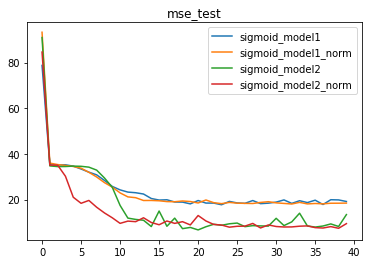

In [28]:
for i,name in enumerate(name_ls1):
  plt.plot(list(range(num_epochs)),test_ls1[i],label=name)
for i,name in enumerate(name_ls2):
  plt.plot(list(range(num_epochs)),test_ls2[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

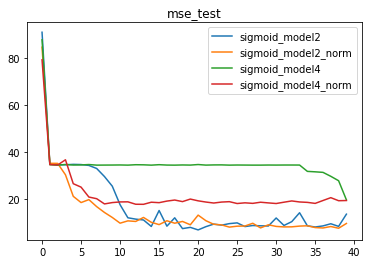

In [30]:
for i,name in enumerate(name_ls2):
  plt.plot(list(range(num_epochs)),test_ls2[i],label=name)
for i,name in enumerate(name_ls4):
  plt.plot(list(range(num_epochs)),test_ls4[i],label=name)
plt.legend(loc=1)
plt.title("mse_test");

##**2.1 Tanh函数**

In [31]:
torch.manual_seed(420)

features, labels = tensorGenReg(w=[2,-1,3,1,2],bias=False,deg=2)
train_loader, test_loader = split_loader(features,labels,batch_size=50)

In [32]:
# class1对比
torch.manual_seed(24)

tanh_model1 = net_class1(act_fun=torch.tanh,in_features=5)
tanh_model1_norm = net_class1(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_ls1 = [tanh_model1,tanh_model1_norm]
name_ls1 = ["tanh_model1","tanh_model1_norm"]

lr = 0.03
num_epochs = 40

train_ls1, test_ls1 = model_comparison(
    model_l=model_ls1,
    name_l=name_ls1,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# class2对比
torch.manual_seed(24)

tanh_model2 = net_class2(act_fun=torch.tanh,in_features=5)
tanh_model2_norm = net_class2(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_ls2 = [tanh_model2,tanh_model2_norm]
name_ls2 = ["tanh_model2","tanh_model2_norm"]

lr = 0.03
num_epochs = 40

train_ls2, test_ls2 = model_comparison(
    model_l=model_ls2,
    name_l=name_ls2,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# class3对比
torch.manual_seed(24)

tanh_model3 = net_class3(act_fun=torch.tanh,in_features=5)
tanh_model3_norm = net_class3(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_ls3 = [tanh_model3,tanh_model3_norm]
name_ls3 = ["tanh_model3","tanh_model3_norm"]

lr = 0.03
num_epochs = 40

train_ls3, test_ls3 = model_comparison(
    model_l=model_ls3,
    name_l=name_ls3,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# class4对比
torch.manual_seed(24)

tanh_model4 = net_class4(act_fun=torch.tanh,in_features=5)
tanh_model4_norm = net_class4(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_ls4 = [tanh_model4,tanh_model4_norm]
name_ls4 = ["tanh_model4","tanh_model4_norm"]

lr = 0.03
num_epochs = 40

train_ls4, test_ls4 = model_comparison(
    model_l=model_ls4,
    name_l=name_ls4,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

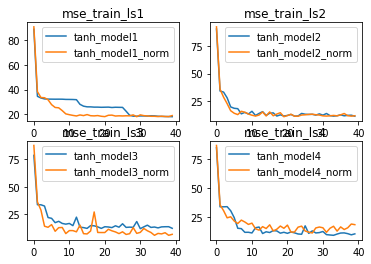

In [33]:
plt.subplot(221)
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), train_ls1[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls1')

plt.subplot(222)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), train_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls2')

plt.subplot(223)
for i, name in enumerate(name_ls3):
    plt.plot(list(range(num_epochs)), train_ls3[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls3')

plt.subplot(224)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), train_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train_ls4');

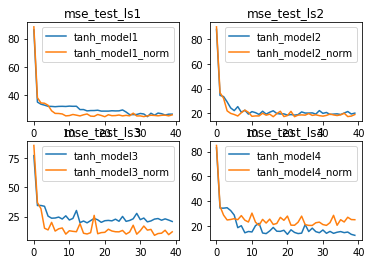

In [34]:
plt.subplot(221)
for i, name in enumerate(name_ls1):
    plt.plot(list(range(num_epochs)), test_ls1[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls1')

plt.subplot(222)
for i, name in enumerate(name_ls2):
    plt.plot(list(range(num_epochs)), test_ls2[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls2')

plt.subplot(223)
for i, name in enumerate(name_ls3):
    plt.plot(list(range(num_epochs)), test_ls3[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls3')

plt.subplot(224)
for i, name in enumerate(name_ls4):
    plt.plot(list(range(num_epochs)), test_ls4[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test_ls4');

Text(0.5, 1.0, 'mse_test')

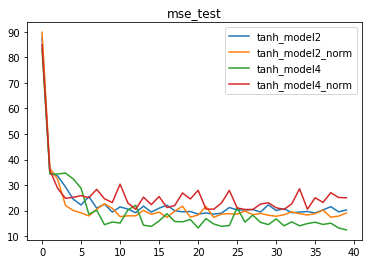

In [35]:
for i,name in enumerate(name_ls2):
  plt.plot(list(range(num_epochs)),test_ls2[i],label=name)
for i,name in enumerate(name_ls4):
  plt.plot(list(range(num_epochs)),test_ls4[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

Text(0.5, 1.0, 'mse_test')

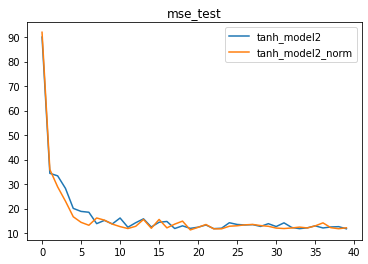

In [43]:
for i,name in enumerate(name_ls2):
  plt.plot(list(range(num_epochs)),train_ls2[i],label=name)
plt.legend(loc=1)
plt.title("mse_test")

In [36]:
train_ls2 # class2的训练误差

tensor([[90.0410, 34.3948, 33.3687, 28.2551, 20.0755, 18.8398, 18.4965, 13.8495,
         15.1790, 13.7212, 16.1514, 12.3776, 14.2214, 15.8150, 12.4728, 14.4185,
         14.7305, 11.8512, 12.9504, 11.9094, 12.4108, 13.2965, 11.8075, 11.9761,
         14.2145, 13.5055, 13.3080, 13.4344, 12.7150, 13.8277, 12.6619, 14.1711,
         12.2711, 11.7944, 12.1514, 12.9450, 12.0820, 12.4810, 12.6158, 11.7481],
        [92.0081, 35.9724, 28.8604, 23.0279, 16.6548, 14.3798, 13.1903, 16.1646,
         15.2639, 13.6663, 12.6325, 11.8537, 12.7641, 15.5530, 11.9614, 15.5579,
         12.1235, 13.6475, 14.8731, 11.2834, 12.3394, 13.4971, 11.7231, 11.7223,
         12.7866, 12.9756, 13.3550, 13.5155, 13.0593, 12.7676, 12.0341, 11.8491,
         12.0746, 12.4311, 12.0827, 12.9327, 14.1644, 12.1968, 11.7727, 12.1459]])

In [37]:
train_ls2[1:,-5:]

tensor([[12.9327, 14.1644, 12.1968, 11.7727, 12.1459]])

In [38]:
train_ls2[1:,-5:].mean()

tensor(12.6425)

In [40]:
test_ls2[1:,-5:].mean()

tensor(18.6611)

##**三、包含BN层的网络的学习率优化**

收敛不平稳的模型，一般对学习率非常敏感

<font color="orange">带BN层的神经网络的不平稳会更大程度受到学习率的影响。换而言之，带BN层的神经网络模型对学习率是高度敏感的，并且带BN层的神经网络模型，在进行学习率调整时能够有更大的优化空间。也就是说，相比不带BN层的模型，带BN层的模型在同样进行某种学习率调整时，会有更好的效果

##**3.1 学习率敏感度**

In [44]:
# 学习率0.1
torch.manual_seed(24)

tanh_model3 = net_class3(act_fun=torch.tanh,in_features=5)
tanh_model3_norm = net_class3(act_fun=torch.tanh,in_features=5,BN_model="pre")
tanh_model4 = net_class4(act_fun=torch.tanh,in_features=5)
tanh_model4_norm = net_class4(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_l = [tanh_model3,tanh_model3_norm,tanh_model4,tanh_model4_norm]
name_l =["tanh_model3","tanh_model3_norm","tanh_model4","tanh_model4_norm"]

num_epochs = 40
lr = 0.1

train_l1, test_l1 = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# 学习率0.03
torch.manual_seed(24)


tanh_model3 = net_class3(act_fun=torch.tanh,in_features=5)
tanh_model3_norm = net_class3(act_fun=torch.tanh,in_features=5,BN_model="pre")
tanh_model4 = net_class4(act_fun=torch.tanh,in_features=5)
tanh_model4_norm = net_class4(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_l = [tanh_model3,tanh_model3_norm,tanh_model4,tanh_model4_norm]
name_l =["tanh_model3","tanh_model3_norm","tanh_model4","tanh_model4_norm"]

num_epochs = 40
lr = 0.03

train_l03, test_l03 = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# 学习率0.01
torch.manual_seed(24)


tanh_model3 = net_class3(act_fun=torch.tanh,in_features=5)
tanh_model3_norm = net_class3(act_fun=torch.tanh,in_features=5,BN_model="pre")
tanh_model4 = net_class4(act_fun=torch.tanh,in_features=5)
tanh_model4_norm = net_class4(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_l = [tanh_model3,tanh_model3_norm,tanh_model4,tanh_model4_norm]
name_l =["tanh_model3","tanh_model3_norm","tanh_model4","tanh_model4_norm"]

num_epochs = 40
lr = 0.01

train_l01, test_l01 = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

# 学习率0.005
torch.manual_seed(24)


tanh_model3 = net_class3(act_fun=torch.tanh,in_features=5)
tanh_model3_norm = net_class3(act_fun=torch.tanh,in_features=5,BN_model="pre")
tanh_model4 = net_class4(act_fun=torch.tanh,in_features=5)
tanh_model4_norm = net_class4(act_fun=torch.tanh,in_features=5,BN_model="pre")

model_l = [tanh_model3,tanh_model3_norm,tanh_model4,tanh_model4_norm]
name_l =["tanh_model3","tanh_model3_norm","tanh_model4","tanh_model4_norm"]

num_epochs = 40
lr = 0.005

train_l005, test_l005 = model_comparison(
    model_l=model_l,
    name_l=name_l,
    train_data=train_loader,
    test_data=test_loader,
    criterion=nn.MSELoss(),
    num_epochs=num_epochs,
    optimizer=optim.SGD,
    lr=lr,
    cla=False,
    eva=mse_cal
)

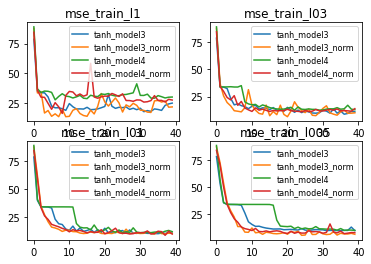

In [50]:
plt.subplot(221)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l1[i], label=name)
plt.legend(loc = 1,fontsize=8)
plt.title('mse_train_l1')

plt.subplot(222)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l03[i], label=name)
plt.legend(loc = 1,fontsize=8)
plt.title('mse_train_l03')

plt.subplot(223)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l01[i], label=name)
plt.legend(loc = 1,fontsize=8)
plt.title('mse_train_l01')

plt.subplot(224)
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_l005[i], label=name)
plt.legend(loc = 1,fontsize=8)
plt.title('mse_train_l005');

##**3.2 学习率学习曲线**

In [54]:
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.01
num_epochs = 40

# 模型训练
train_ls, test_ls = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)

Text(0.5, 1.0, 'mse_train')

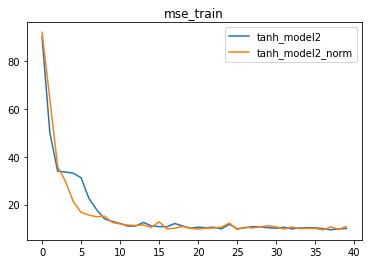

In [55]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), train_ls[i], label=name)
plt.legend(loc = 1)
plt.title('mse_train')

Text(0.5, 1.0, 'mse_test')

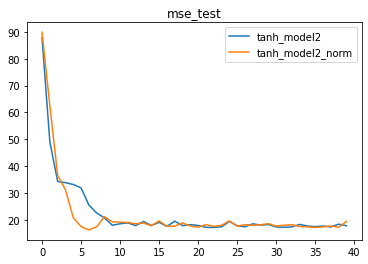

In [56]:
# 训练误差
for i, name in enumerate(name_l):
    plt.plot(list(range(num_epochs)), test_ls[i], label=name)
plt.legend(loc = 1)
plt.title('mse_test')

In [57]:
# 学习率0.01时的模型误差
train_ls[1:,-5:].mean(),test_ls[1:,-5:].mean()

(tensor(10.1614), tensor(17.7898))

In [58]:
# 学习率0.03时的模型误差
train_ls2[1:,-5:].mean(),test_ls2[1:,-5:].mean()

(tensor(12.6425), tensor(18.6611))

In [59]:
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.001
num_epochs = 40

# 模型训练
train_lss, test_lss = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)

In [60]:
train_lss[1:,-5:].mean(),test_lss[1:,-5:].mean()

(tensor(9.3185), tensor(16.9204))

In [61]:
torch.manual_seed(24)  

# 实例化模型  
tanh_model2 = net_class2(act_fun= torch.tanh, in_features=5)
tanh_model2_norm = net_class2(act_fun= torch.tanh, in_features=5, BN_model='pre')
     
# 创建模型容器
model_l = [tanh_model2, tanh_model2_norm]           
name_l = ['tanh_model2', 'tanh_model2_norm']

# 核心参数
lr = 0.005
num_epochs = 40

# 模型训练
train_lms, test_lms = model_comparison(model_l = model_l, 
                                     name_l = name_l, 
                                     train_data = train_loader,
                                     test_data = test_loader,
                                     num_epochs = num_epochs, 
                                     criterion = nn.MSELoss(), 
                                     optimizer = optim.SGD, 
                                     lr = lr, 
                                     cla = False, 
                                     eva = mse_cal)

In [62]:
train_lms[1:,-5:].mean(),test_lms[1:,-5:].mean()

(tensor(9.5439), tensor(17.3677))

In [65]:
lr_1 = [0.03,0.01,0.005,0.001]
train_ln = [train_ls2[1:,-5:].mean(),train_ls[1:,-5:].mean(),train_lms[1:,-5:].mean(),train_lss[1:,-5:].mean()]
test_ln = [test_ls2[1:,-5:].mean(),test_ls[1:,-5:].mean(),test_lms[1:,-5:].mean(),test_lss[1:,-5:].mean()]

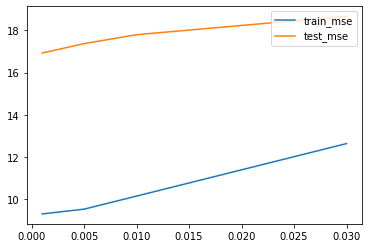

In [66]:
plt.plot(lr_1,train_ln,label="train_mse")
plt.plot(lr_1,test_ln,label="test_mse")
plt.legend(loc=1)

通常会出现<font color="orange">倒U型</font>，上述图中没找到最好的学习率,可能0.001效果最好

In [67]:
lr_1 = [0.03,0.01,0.005,0.001]
train_ln = [train_ls2[1:,-5:].mean(),train_ls[1:,-5:].mean(),train_lms[1:,-5:].mean(),train_lss[1:,-5:].mean()]
test_ln = [test_ls2[1:,-5:].mean(),test_ls[1:,-5:].mean(),test_lms[1:,-5:].mean(),test_lss[1:,-5:].mean()]
train_ln1 = [train_ls2[0:,-5:].mean(),train_ls[0:,-5:].mean(),train_lms[0:,-5:].mean(),train_lss[0:,-5:].mean()]
test_ln1 = [test_ls2[0:,-5:].mean(),test_ls[0:,-5:].mean(),test_lms[0:,-5:].mean(),test_lss[0:,-5:].mean()]

Text(0.5, 1.0, 'Without BN(tanh)')

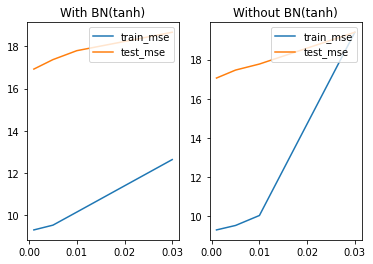

In [68]:
plt.subplot(121)
plt.plot(lr_1,train_ln,label="train_mse")
plt.plot(lr_1,test_ln,label="test_mse")
plt.legend(loc=1)
plt.title("With BN(tanh)")
plt.subplot(122)
plt.plot(lr_1,train_ln1,label="train_mse")
plt.plot(lr_1,test_ln1,label="test_mse")
plt.legend(loc=1)
plt.title("Without BN(tanh)")